<a href="https://colab.research.google.com/github/Kamui964/CODSOFT/blob/master/Titanic_survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score

In [99]:
df=pd.read_csv('/content/tested[1].csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [100]:
df.shape

(418, 12)

In [101]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [102]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [104]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<BarContainer object of 2 artists>

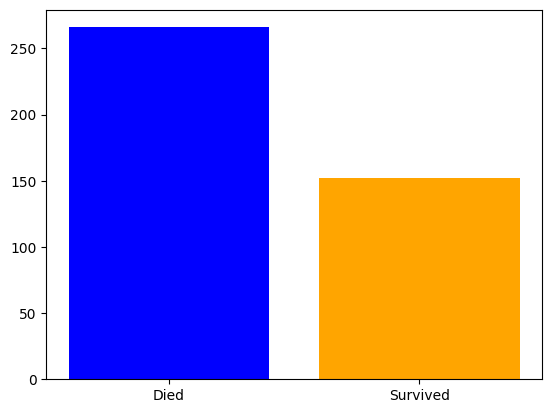

In [105]:
val=df['Survived'].value_counts()
plt.bar(['Died','Survived'],val.values,color=['blue','orange'])

In [106]:
df.groupby('Survived')['Age'].mean()

Survived
0    30.272732
1    30.272362
Name: Age, dtype: float64

In [107]:
df.groupby('Survived')['Fare'].mean()

Survived
0    27.527877
1    49.747699
Name: Fare, dtype: float64

In [108]:
df.groupby('Sex')['Survived'].value_counts().unstack(fill_value=0)

Survived,0,1
Sex,,
female,0,152
male,266,0


In [109]:
df.groupby('Survived')['Pclass'].value_counts()

Survived  Pclass
0         3         146
          2          63
          1          57
1         3          72
          1          50
          2          30
Name: Pclass, dtype: int64

In [110]:
print(df[df['Survived']==1]['Age'].min(), df[df['Survived']==1]['Age'].max())

0.17 76.0


In [111]:
print(df[df['Survived']==0]['Age'].min(), df[df['Survived']==0]['Age'].max())

0.33 67.0


In [112]:
df=df.drop(['Cabin','Name','PassengerId','Ticket'],axis=1)

In [113]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [114]:
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])

In [126]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Fare'].fillna(0,inplace=True)

<Axes: >

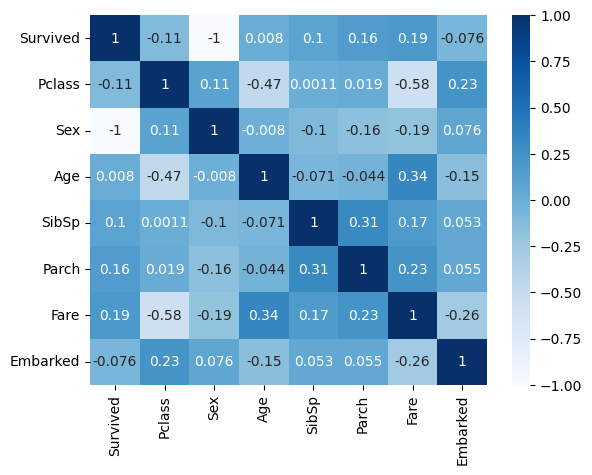

In [127]:
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True, cmap='Blues')

In [128]:
X=df.drop(['Survived','Pclass'],axis=1)
y=df['Survived']

In [129]:
X.isnull().sum()

Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [130]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(313, 6) (105, 6) (313,) (105,)


In [153]:
s=StandardScaler()
X_train_s=s.fit_transform(X_train)
X_test_s=s.transform(X_test)

In [154]:
import tensorflow as tf
from tensorflow import keras

In [155]:
model=keras.Sequential([
    keras.layers.Dense(32,activation='relu',input_shape=(6,)),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(1)
])

In [156]:
model.compile(
    optimizer='Adam',
    loss='mean_squared_error',
)

In [167]:
hist=model.fit(X_train_s,y_train,epochs=10,batch_size=32,validation_split=0.15)

Epoch 1/10
9/9 [==============================] - 0s 19ms/step - loss: 0.0027 - val_loss: 0.0037
Epoch 2/10
9/9 [==============================] - 0s 11ms/step - loss: 0.0022 - val_loss: 0.0037
Epoch 3/10
9/9 [==============================] - 0s 8ms/step - loss: 0.0019 - val_loss: 0.0033
Epoch 4/10
9/9 [==============================] - 0s 14ms/step - loss: 0.0016 - val_loss: 0.0029
Epoch 5/10
9/9 [==============================] - 0s 13ms/step - loss: 0.0014 - val_loss: 0.0028
Epoch 6/10
9/9 [==============================] - 0s 10ms/step - loss: 0.0013 - val_loss: 0.0028
Epoch 7/10
9/9 [==============================] - 0s 9ms/step - loss: 0.0011 - val_loss: 0.0021
Epoch 8/10
9/9 [==============================] - 0s 11ms/step - loss: 0.0010 - val_loss: 0.0023
Epoch 9/10
9/9 [==============================] - 0s 12ms/step - loss: 8.9168e-04 - val_loss: 0.0022
Epoch 10/10
9/9 [==============================] - 0s 13ms/step - loss: 7.9916e-04 - val_loss: 0.0019


In [168]:
model.evaluate(X_test_s,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.0031


0.003112969221547246

In [169]:
y_pred=model.predict(X_test_s)

4/4 [==============================] - 0s 4ms/step


In [170]:
r2_score(y_test,y_pred)

0.9870292959938227

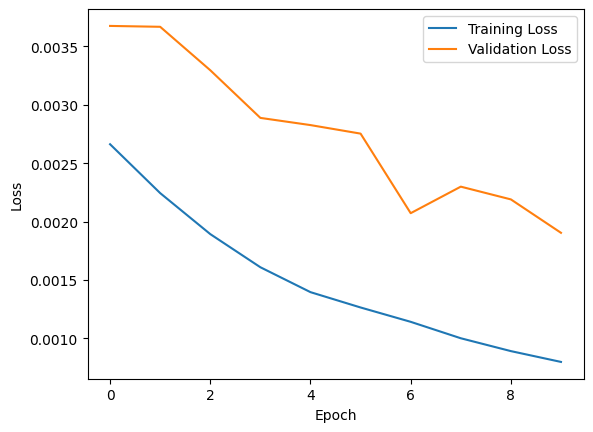

In [171]:
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()